<a href="https://colab.research.google.com/github/Kingayo123/Development-of-a-machine-learning-model-for-fish-classification-2/blob/main/DEVELOPMENT_OF_A_MACHINE_LEARNING_MODEL_FOR_FISH_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
pip install tensorflow matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/My Drive/Fish_Dataset"  # change this if your folder name differs
print("Classes:", os.listdir(base_dir))

Classes: ['Shrimp', 'Trout', 'Striped Red Mullet', 'Sea Bass', 'Red Sea Bream', 'Hourse Mackerel', 'Gilt-Head Bream', 'Black Sea Sprat']


# Load Dataset from Directory


In [ ]:
import tensorflow as tf

img_size = (150, 150)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 8015 files belonging to 8 classes.
Using 6412 files for training.
Found 8015 files belonging to 8 classes.
Using 1603 files for validation.


# Optimize Dataset

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build CNN Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models # Import models here

# Get the class names from the training dataset BEFORE transformations
# Store the original dataset created by image_dataset_from_directory
original_train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names from the original dataset
class_names = original_train_ds.class_names
print("Class Names:", class_names) # Optional: print class names to verify

# Apply transformations to the original dataset and reassign to train_ds
AUTOTUNE = tf.data.AUTOTUNE
train_ds = original_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# The validation dataset transformations can remain the same as they don't affect class_names access here
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    # Use the stored class_names here
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Changed loss function
              metrics=['accuracy'])

model.summary()

Found 8015 files belonging to 8 classes.
Using 6412 files for training.
Class Names: ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
Found 8015 files belonging to 8 classes.
Using 1603 files for validation.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,384 (18.42 MB)

 Trainable params: 4,829,384 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1994s 2s/step - accuracy: 0.3207 - loss: 1.7992 - val_accuracy: 0.7498 - val_loss: 0.7372
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7396 - loss: 0.7397 - val_accuracy: 0.9283 - val_loss: 0.2551
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8763 - loss: 0.3662 - val_accuracy: 0.9750 - val_loss: 0.1215
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9285 - loss: 0.2216 - val_accuracy: 0.9694 - val_loss: 0.0986
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9411 - loss: 0.1629 - val_accuracy: 0.9857 - val_loss: 0.0493
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9536 - loss: 0.1311 - val_accuracy: 0.9769 - val_loss: 0.0692
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9582 - loss: 0.1199 - val_accuracy: 0.9813 - val_loss: 0.0515
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9685 - loss: 0.0979 - val_a

# Evaluate the Model - Visualize Training & Validation Accuracy and Loss

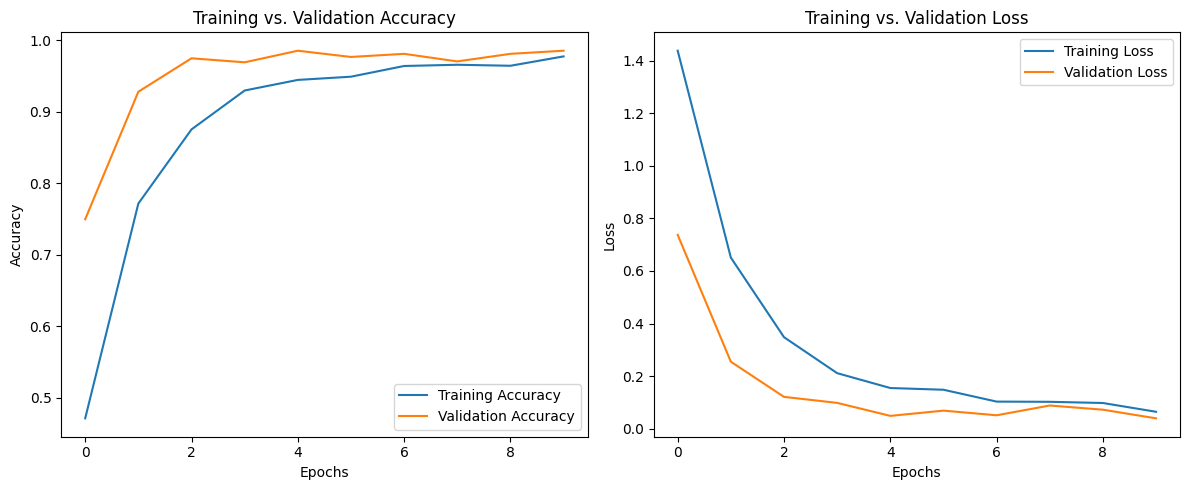

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
